In [320]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from covid19dh import covid19

In [321]:
x, src = covid19(verbose=False)
x.head()

,id,date,confirmed,deaths,recovered,tests,vaccines,people_vaccinated,people_fully_vaccinated,hosp,...,iso_alpha_3,iso_alpha_2,iso_numeric,iso_currency,key_local,key_google_mobility,key_apple_mobility,key_jhu_csse,key_nuts,key_gadm
65898,0094b645,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LCA,LC,662.0,XCD,NaN,NaN,NaN,LC,NaN,LCA
65899,0094b645,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LCA,LC,662.0,XCD,NaN,NaN,NaN,LC,NaN,LCA
65900,0094b645,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LCA,LC,662.0,XCD,NaN,NaN,NaN,LC,NaN,LCA
65901,0094b645,2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LCA,LC,662.0,XCD,NaN,NaN,NaN,LC,NaN,LCA
65902,0094b645,2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LCA,LC,662.0,XCD,NaN,NaN,NaN,LC,NaN,LCA


In [322]:
print(x.columns)

Index(['id', 'date', 'confirmed', 'deaths', 'recovered', 'tests', 'vaccines',
       'people_vaccinated', 'people_fully_vaccinated', 'hosp', 'icu', 'vent',
       'school_closing', 'workplace_closing', 'cancel_events',
       'gatherings_restrictions', 'transport_closing',
       'stay_home_restrictions', 'internal_movement_restrictions',
       'international_movement_restrictions', 'information_campaigns',
       'testing_policy', 'contact_tracing', 'facial_coverings',
       'vaccination_policy', 'elderly_people_protection',
       'government_response_index', 'stringency_index',
       'containment_health_index', 'economic_support_index',
       'administrative_area_level', 'administrative_area_level_1',
       'administrative_area_level_2', 'administrative_area_level_3',
       'latitude', 'longitude', 'population', 'iso_alpha_3', 'iso_alpha_2',
       'iso_numeric', 'iso_currency', 'key_local', 'key_google_mobility',
       'key_apple_mobility', 'key_jhu_csse', 'key_nuts', 'key_g

Na podstawie dokumentacji można podzielić kolumny na kategorię przedstawione na stronie https://covid19datahub.io/articles/docs.html

Są to następujące kategorie: Identifiers, Epidemiological variables, Policy measures, Government response, Administrative areas, Coordinates, ISO codes, External keys

In [323]:
# Identifiers, Epidemiological variables, Policy measures, Government response, Administrative areas, Coordinates, ISO codes, External keys
Identifiers = ["id", "date"]
Epidemiological_variables = ["confirmed", "deaths", "recovered", "tests", "vaccines", "people_vaccinated", "people_fully_vaccinated", "hosp", "icu", "vent", "population"]
Policy_measures = ["school_closing", "workplace_closing", "cancel_events", "gatherings_restrictions", "transport_closing", "stay_home_restrictions",
                    "internal_movement_restrictions", "international_movement_restrictions", "information_campaigns", "testing_policy", "contact_tracing",
                    "facial_coverings", "vaccination_policy", "elderly_people_protection"]
Government_response = ["government_response_index", "stringency_index", "containment_health_index", "economic_support_index"]
Administrative_areas = ["administrative_area_level", "administrative_area_level_1", "administrative_area_level_2", "administrative_area_level_3"]
Coordinates = ["latitude", "longitude"]
ISO_codes = ["iso_alpha_3", "iso_alpha_2", "iso_numeric", "iso_currency"]
External_Keys = ["key_local", "key_google_mobility", "key_apple_mobility", "key_jhu_csse", "key_nuts", "key_gadm"]

x['country'] = x['administrative_area_level_1']

In [324]:
df_temp = x.groupby('country').size().reset_index(name='counts')
df_temp = df_temp.sort_values(by='counts', ascending=False)
df_temp = df_temp.reset_index(drop=True)
df_temp.head()


,country,counts
0,Canada,1612
1,Malaysia,1610
2,India,1610
3,Bangladesh,1610
4,Greece,1609


In [325]:
categories = [
    ('Identifiers', Identifiers),
    ('Epidemiological_variables', Epidemiological_variables),
    ('Policy_measures', Policy_measures),
    ('Government_response', Government_response),
    ('Administrative_areas', Administrative_areas),
    ('Coordinates', Coordinates),
    ('ISO_codes', ISO_codes),
    ('External_Keys', External_Keys)
]

data = []

for country in x['country'].unique():
    row = [country]
    country_df = x[x['country'] == country]
    for category_name, columns in categories:
        nan_values = country_df[columns].isnull().sum().sum()
        total_values = country_df[columns].size
        nan_values_percentage = round(nan_values / total_values * 100, 2)
        row.extend([nan_values, nan_values_percentage])
    data.append(row)

column_tuples = [('country', '')]
for category_name, _ in categories:
    column_tuples.extend([(category_name, 'nan'), (category_name, 'nan_percentage')])

multi_index = pd.MultiIndex.from_tuples(column_tuples, names=['category', 'metric'])

df = pd.DataFrame(data, columns=multi_index)
df

category        country Identifiers                Epidemiological_variables  \
metric                          nan nan_percentage                       nan   
0           Saint Lucia           0            0.0                      8855   
1             Guatemala           0            0.0                      7708   
2                Guyana           0            0.0                      8664   
3                 Italy           0            0.0                      3114   
4                Belize           0            0.0                      9364   
..                  ...         ...            ...                       ...   
231            Anguilla           0            0.0                     10070   
232         Netherlands           0            0.0                      4604   
233               Japan           0            0.0                      3071   
234              Russia           0            0.0                      8923   
235       Liechtenstein           0            0.0                      4544   

category                Policy_measures                Government_response  \
metric   nan_percentage             nan nan_percentage                 nan   
0                 69.28           16268         100.00                4648   
1                 56.92            1918          11.13                 548   
2                 67.78             952           5.85                 272   
3                 18.18            7210          33.08                2060   
4                 69.15            1918          11.13                 548   
..                  ...             ...            ...                 ...   
231               76.93           16660         100.00                4760   
232               45.59             140           1.09                  65   
233               23.60            1792          10.82                 512   
234               59.47            3780          19.79                1080   
235               37.55             812           5.27                 232   

category                Administrative_areas                Coordinates  \
metric   nan_percentage                  nan nan_percentage         nan   
0                100.00                 2324           50.0           0   
1                 11.13                 2462           50.0           0   
2                  5.85                 2324           50.0           0   
3                 33.08                 3114           50.0           0   
4                 11.13                 2462           50.0           0   
..                  ...                  ...            ...         ...   
231              100.00                 2380           50.0           0   
232                1.77                 1836           50.0           0   
233               10.82                 2366           50.0           0   
234               19.79                 2728           50.0           0   
235                5.27                 2200           50.0           0   

category                ISO_codes                External_Keys                 
metric   nan_percentage       nan nan_percentage           nan nan_percentage  
0                   0.0         0            0.0          4648          66.67  
1                   0.0         0            0.0          3693          50.00  
2                   0.0         0            0.0          4648          66.67  
3                   0.0         0            0.0          3114          33.33  
4                   0.0         0            0.0          3693          50.00  
..                  ...       ...            ...           ...            ...  
231                 0.0         0            0.0          5950          83.33  
232                 0.0         0            0.0          1836          33.33  
233                 0.0         0            0.0          2366          33.33  
234                 0.0         0            0.0          2728          33.33  
235     

Policzony zostanie średni procent brakujących wartości dla ważnych kategorii które można wykorzystać poźniej.

Jako istotne kategorie należy zaliczyć: Epidemiological_variables, Policy_measures oraz Government_response, ostatnia z nich nie będzie jednak brana pod uwagę w liczeniu średniej ponieważ jest to kategoria wartości oceniających starania rządu policzona na podstawie danych z kategorii Policy_measures.

In [326]:
df['mean_important_nan'] = df[[('Epidemiological_variables', 'nan_percentage'),
                            ('Policy_measures', 'nan_percentage')]].mean(axis=1)

df.sort_values(by='mean_important_nan', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

df.head(10)

category    country Identifiers                Epidemiological_variables  \
metric                      nan nan_percentage                       nan   
0         Lithuania           0            0.0                         0   
1              Peru           0            0.0                       761   
2             Chile           0            0.0                      1293   
3           Estonia           0            0.0                      2946   
4          Portugal           0            0.0                      2559   
5           Belgium           0            0.0                      2519   
6             Japan           0            0.0                      3071   
7          Slovenia           0            0.0                      3309   
8           Denmark           0            0.0                      3667   
9         Singapore           0            0.0                      2859   

category                Policy_measures                Government_response  \
metric   nan_percentage             nan nan_percentage                 nan   
0                  0.00             294           2.55                  84   
1                 10.22             109           1.15                  82   
2                 11.03             448           3.00                 128   
3                 26.70             196           1.40                  56   
4                 28.72               0           0.00                   0   
5                 18.26            2506          14.27                 716   
6                 23.60            1792          10.82                 512   
7                 33.54             238           1.90                  68   
8                 28.13            1274           7.68                 364   
9                 35.56              56           0.55                  16   

category                Administrative_areas                Coordinates  \
metric   nan_percentage                  nan nan_percentage         nan   
0                  2.55                 1648           50.0           0   
1                  3.03                 1354           50.0           0   
2                  3.00                 2132           50.0           0   
3                  1.40                 2006           50.0           0   
4                  0.00                 1620           50.0           0   
5                 14.27                 2508           50.0           0   
6                 10.82                 2366           50.0           0   
7                  1.90                 1794           50.0           0   
8                  7.68                 2370           50.0           0   
9                  0.55                 1462           50.0           0   

category                ISO_codes                External_Keys                 \
metric   nan_percentage       nan nan_percentage           nan nan_percentage   
0                   0.0         0            0.0          1648          33.33   
1                   0.0         0            0.0          2031          50.00   
2                   0.0         0            0.0          2132          33.33   
3                   0.0         0            0.0          2006          33.33   
4                   0.0         0            0.0          1620          33.33   
5                   0.0         0            0.0          2508          33.33   
6                   0.0         0            0.0          2366          33.33   
7                   0.0         0            0.0          1794          33.33   
8                   0.0         0            0.0          2370          33.33   
9                   0.0         0            0.0          1462          33.33   

category mean_important_nan  
metric                       
0                     1.275  
1                     5.685  
2                     7.015  
3                    14.050  
4                    14.360  
5                    16.265  
6                    17.210  
7     

In [327]:
countries = x['country'].unique()

df_ranked = pd.DataFrame(columns=['country', 'mean_important_nan', 'counts', 'rank_important_nan', 'rank_counts'])
for country in countries:
    rank_important_nan = df[df['country'] == country].index[0] + 1
    rank_counts = df_temp[df_temp['country'] == country].index[0] + 1
    df_ranked = pd.concat([df_ranked, pd.DataFrame([[country, df.loc[df['country'] == country, 'mean_important_nan'].values[0],
                                                        df_temp.loc[df_temp['country'] == country, 'counts'].values[0],
                                                        rank_important_nan, rank_counts]], columns=df_ranked.columns)], ignore_index=True)

df_ranked['mean_important_nan'] = df_ranked['mean_important_nan'].astype(float)
df_ranked['counts'] = df_ranked['counts'].astype(int)
df_ranked['rank_important_nan'] = df_ranked['rank_important_nan'].astype(int)
df_ranked['rank_counts'] = df_ranked['rank_counts'].astype(int)
df_ranked['avg_rank'] = (df_ranked['rank_important_nan'] + df_ranked['rank_counts']) / 2
df_ranked.sort_values(by='avg_rank', ascending=True, inplace=True)
df_ranked.reset_index(drop=True, inplace=True)
df_ranked.head(10)

C:\Users\bugaj\AppData\Local\Temp\ipykernel_5944\1864215611.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_ranked = pd.concat([df_ranked, pd.DataFrame([[country, df.loc[df['country'] == country, 'mean_important_nan'].values[0],


,country,mean_important_nan,counts,rank_important_nan,rank_counts,avg_rank
0,Czech Republic,20.230,1588,14,8,11.0
1,Italy,25.630,1557,30,24,27.0
2,Ireland,31.410,1593,49,7,28.0
3,Malaysia,32.675,1610,54,2,28.0
4,Canada,35.435,1612,71,1,36.0
5,Belgium,16.265,1254,6,84,45.0
6,France,20.585,1266,16,76,46.0
7,Australia,23.050,1288,22,73,47.5
8,Argentina,35.470,1488,72,25,48.5
9,United States,36.030,1573,76,21,48.5


Kraj który zajmuje najlepsze miejsce po uwzględnieniu tych 2 rankingów pod względem ilości brakujących danych oraz całkowitej ilości danych to Czechy, dlatego zostanie on poddany dalszej analizie.

In [328]:
df_czechy= x[x['country'] == 'Czech Republic'].copy()

# Usunięcie kolumny 'country', bo wszędzie jest 'Czech Republic'
df_czechy.drop(columns='country', inplace=True)
# Usunięcie kolumny population, bo wszędzie jest ta sama wartość
population = df_czechy['population'].unique()[0]
df_czechy.drop(columns='population', inplace=True)

df_czechy['date'] = pd.to_datetime(df_czechy['date'])
df_czechy.set_index('date', inplace=True)

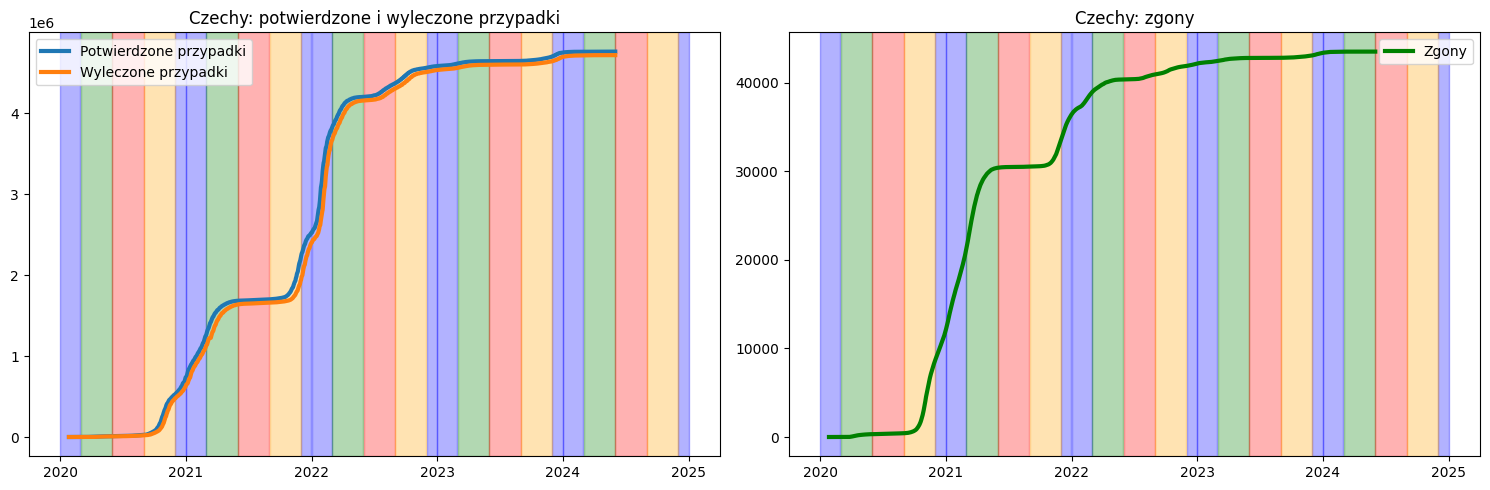

W trakcie całej pandemii w Czechach zanotowano:
 - 4 759 716 potwierdzonych przypadków
 - 4 716 076 wyleczonych przypadków
 - 43 523 zgonów


In [329]:
def add_season_spans(ax, start_year, end_year):
    seasons = {
        'winter': ('blue', [(12, 12), (1, 2)]), # grudzień, styczeń, luty
        'spring': ('green', [(3, 5)]), # marzec, kwiecień, maj
        'summer': ('red', [(6, 8)]), # czerwiec, lipiec, sierpień 
        'autumn': ('orange', [(9, 11)]) # wrzesień, październik, listopad
    }
    
    for year in range(start_year, end_year + 1):
        for season, (color, months_ranges) in seasons.items():
            for start_month, end_month in months_ranges:
                start_date = pd.Timestamp(year=year, month=start_month, day=1)
                end_date = pd.Timestamp(year=year if start_month <= end_month else year + 1, month=end_month, day=1) + pd.offsets.MonthEnd(0)
                ax.axvspan(start_date, end_date, color=color, alpha=0.3)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(df_czechy.index, df_czechy['confirmed'], label='Potwierdzone przypadki', lw=3)
ax[0].plot(df_czechy.index, df_czechy['recovered'], label='Wyleczone przypadki', lw=3)
ax[1].plot(df_czechy.index, df_czechy['deaths'], label='Zgony', color='green', lw=3)

# Dodawanie pór roku do wykresów
start_year = df_czechy.index.min().year
end_year = df_czechy.index.max().year
add_season_spans(ax[0], start_year, end_year)
add_season_spans(ax[1], start_year, end_year)

ax[0].set_title('Czechy: potwierdzone i wyleczone przypadki')
ax[1].set_title('Czechy: zgony')
ax[0].legend()
ax[1].legend()
plt.tight_layout()
plt.show()

print("W trakcie całej pandemii w Czechach zanotowano:")
print(f" - {int(df_czechy['confirmed'].max()):,} potwierdzonych przypadków".replace(",", " "))
print(f" - {int(df_czechy['recovered'].max()):,} wyleczonych przypadków".replace(",", " "))
print(f" - {int(df_czechy['deaths'].max()):,} zgonów".replace(",", " "))

Jak już wcześniej zostało wspomniane jedyne istotne kategorie w kontekście związane z przebiegiem choroby to: Epidemiological_variables, Policy_measures oraz Government_response, pozostałe kolumny można usunąć.

In [330]:
# Usunięcie "population" z Epidemiological_variables
if "population" in Epidemiological_variables:
    Epidemiological_variables.remove("population")

df_czechy = df_czechy[Epidemiological_variables + Policy_measures + Government_response]
df_czechy.head()

,confirmed,deaths,recovered,tests,vaccines,people_vaccinated,people_fully_vaccinated,hosp,icu,vent,...,information_campaigns,testing_policy,contact_tracing,facial_coverings,vaccination_policy,elderly_people_protection,government_response_index,stringency_index,containment_health_index,economic_support_index
date,,,,,,,,,,,,,,,,,,,,,
2020-01-27,0.0,0.0,0.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.0,0.0,0.0,0.0,0.0,0.0,6.25,11.11,7.14,0.0
2020-01-28,0.0,0.0,0.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.0,0.0,0.0,0.0,0.0,0.0,6.25,11.11,7.14,0.0
2020-01-29,0.0,0.0,0.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.0,0.0,0.0,0.0,0.0,0.0,6.25,11.11,7.14,0.0
2020-01-30,0.0,0.0,0.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.0,0.0,0.0,0.0,0.0,0.0,9.38,16.67,10.71,0.0
2020-01-31,0.0,0.0,0.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.0,0.0,0.0,0.0,0.0,0.0,9.38,16.67,10.71,0.0


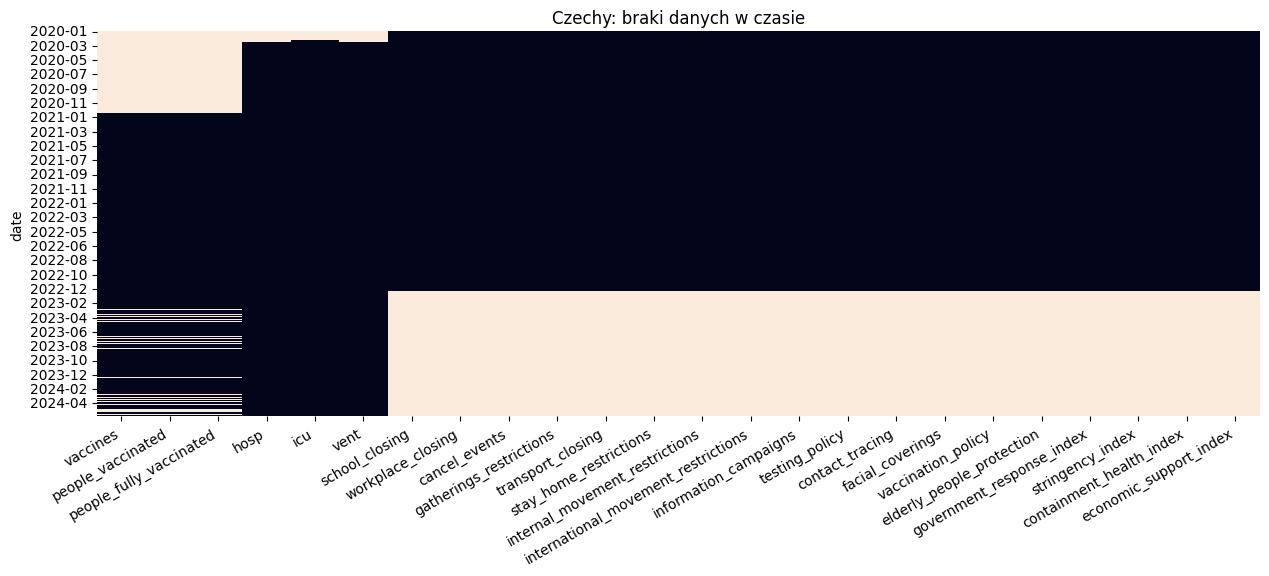

In [331]:
df_czechy_non_null = df_czechy.loc[:, df_czechy.isnull().any()]
df_czechy_non_null.index = df_czechy_non_null.index.strftime('%Y-%m')

plt.figure(figsize=(15, 5))
sns.heatmap(df_czechy_non_null.isnull(), cbar=False)
plt.title('Czechy: braki danych w czasie')
plt.xticks(rotation=30, ha='right');
plt.show()

Możemy założyć, że ciągi braków danych od pierwszej daty w zbiorze do daty w której pojawiają się pierwsze wartości są równe 0 ponieważ był to sam początek pandemii i nie było wtedy szczepionki, ludzi hospitalizowanych z powodu covid itp.

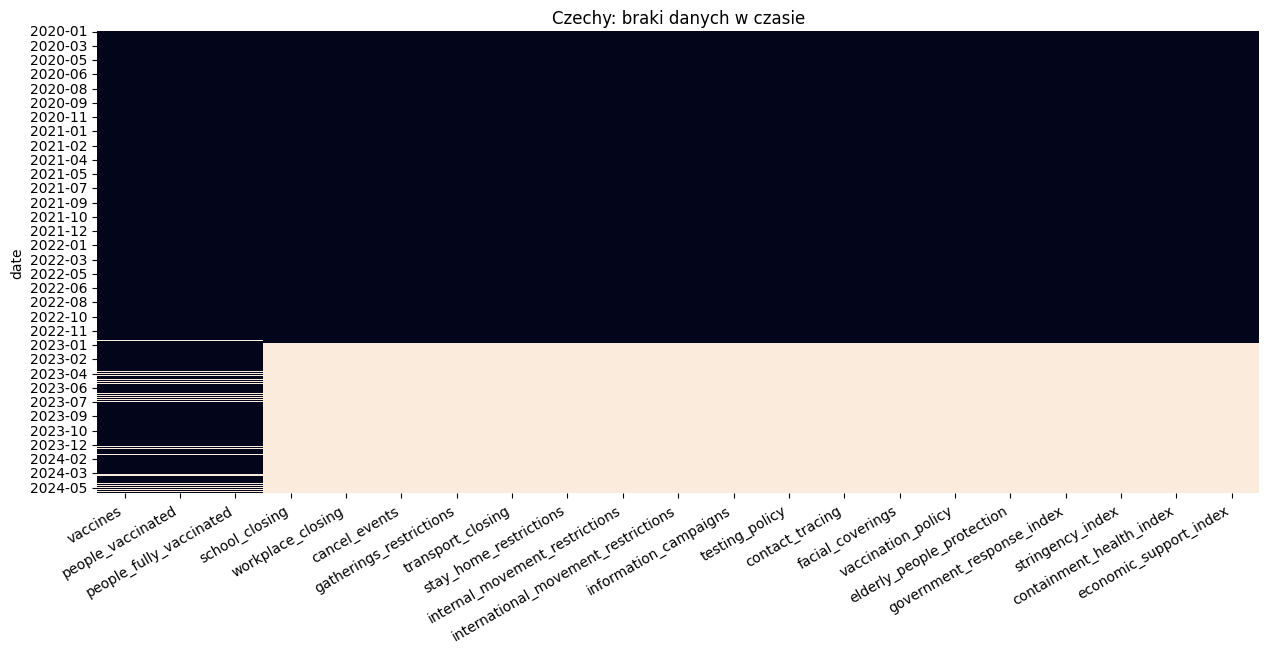

In [332]:
# Wypełnianie NaN wartościami 0 tylko do pierwszej nie-NaN wartości w każdej kolumnie
for column in df_czechy.columns:
    mask = df_czechy[column].notna()
    if mask.any():
        first_non_nan_index = mask.idxmax()
        df_czechy[column] = df_czechy[column].where(df_czechy.index > first_non_nan_index, other=0)

df_czechy_non_null = df_czechy.loc[:, df_czechy.isnull().any()]
df_czechy_non_null.index = df_czechy_non_null.index.strftime('%Y-%m')

plt.figure(figsize=(15, 6))
sns.heatmap(df_czechy_non_null.isnull(), cbar=False)
plt.title('Czechy: braki danych w czasie')
plt.xticks(rotation=30, ha='right');
plt.show()

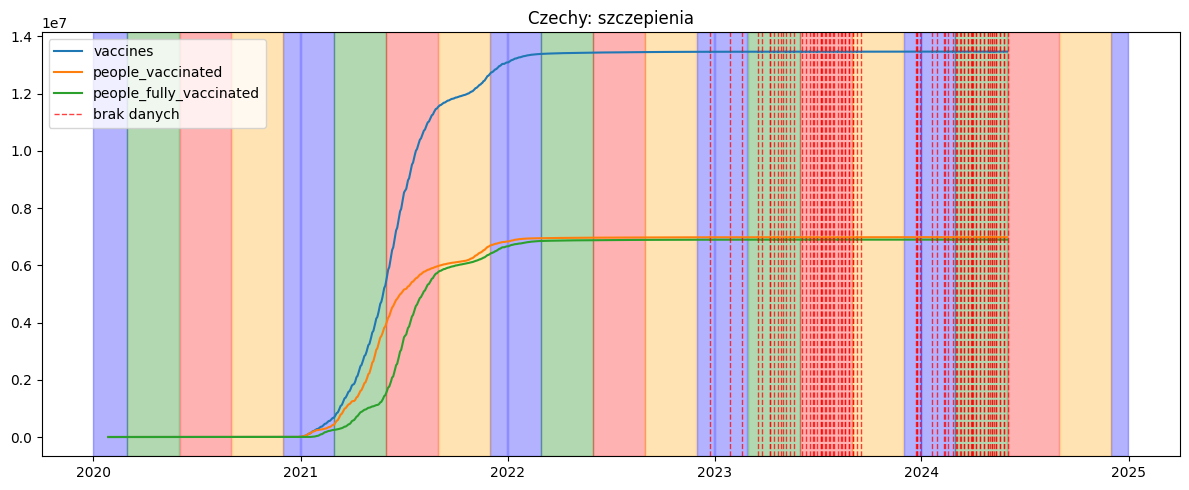

In [333]:
# wykres kolumn vaccines, people_vaccinated, people_fully_vaccinated
plt.figure(figsize=(12, 5))
plt.plot(df_czechy.index, df_czechy['vaccines'], label='vaccines')
plt.plot(df_czechy.index, df_czechy['people_vaccinated'], label='people_vaccinated')
plt.plot(df_czechy.index, df_czechy['people_fully_vaccinated'], label='people_fully_vaccinated')

for date in df_czechy.index[df_czechy['vaccines'].isnull()]:
    plt.axvline(date, color='red', linestyle='--', alpha=0.75, linewidth=1, label='brak danych')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())


start_year = df_czechy.index.min().year
end_year = df_czechy.index.max().year
add_season_spans(plt.gca(), start_year, end_year)


plt.title('Czechy: szczepienia')
plt.tight_layout()
plt.show()

Jak można zauważyć wszystkie braki poza 1 brakiem mają miejsce w roku 2023 i później. Można założyć, że wtedy pandemii COVID nie było już w Czechach, nie obowiązywały już wtedy obostrzenia a przyrosty zachorowań są bardzo małe w porównaniu do wcześniejszych okresów.

In [334]:
# usunięcie danych od 2023 roku
df_czechy = df_czechy[df_czechy.index <= '2022-12-31']

In [335]:
df_czechy.tail(10)

,confirmed,deaths,recovered,tests,vaccines,people_vaccinated,people_fully_vaccinated,hosp,icu,vent,...,information_campaigns,testing_policy,contact_tracing,facial_coverings,vaccination_policy,elderly_people_protection,government_response_index,stringency_index,containment_health_index,economic_support_index
date,,,,,,,,,,,,,,,,,,,,,
2022-12-22,4576953.0,42083.0,4525521.0,56276145.0,13459494.0,6977614.0,6893420.0,836.0,60.0,15.0,...,2.0,2.0,0.0,0.0,5.0,0.0,16.67,11.11,19.05,0.0
2022-12-23,4577460.0,42094.0,4526613.0,56280993.0,13459518.0,6977625.0,6893437.0,757.0,55.0,14.0,...,2.0,2.0,0.0,0.0,5.0,0.0,16.67,11.11,19.05,0.0
2022-12-24,4577558.0,42099.0,4527545.0,56281919.0,NaN,NaN,NaN,594.0,53.0,15.0,...,2.0,2.0,0.0,0.0,5.0,0.0,16.67,11.11,19.05,0.0
2022-12-25,4577674.0,42104.0,4528381.0,56283166.0,13459518.0,6977625.0,6893437.0,603.0,57.0,15.0,...,2.0,2.0,0.0,0.0,5.0,0.0,16.67,11.11,19.05,0.0
2022-12-26,4577790.0,42108.0,4529132.0,56284402.0,13459519.0,6977626.0,6893438.0,627.0,64.0,17.0,...,2.0,2.0,0.0,0.0,5.0,0.0,16.67,11.11,19.05,0.0
2022-12-27,4578560.0,42122.0,4529310.0,56291839.0,13459532.0,6977627.0,6893450.0,762.0,68.0,23.0,...,2.0,2.0,0.0,0.0,5.0,0.0,16.67,11.11,19.05,0.0
2022-12-28,4579151.0,42128.0,4529474.0,56297621.0,13459564.0,6977642.0,6893468.0,710.0,60.0,23.0,...,2.0,2.0,0.0,0.0,5.0,0.0,16.67,11.11,19.05,0.0
2022-12-29,4579719.0,42139.0,4530651.0,56302986.0,13459581.0,6977646.0,6893481.0,675.0,55.0,22.0,...,2.0,2.0,0.0,0.0,5.0,0.0,16.67,11.11,19.05,0.0
2022-12-30,4580166.0,42152.0,4531456.0,56307413.0,13459611.0,6977655.0,6893503.0,665.0,53.0,20.0,...,2.0,2.0,0.0,0.0,5.0,0.0,16.67,11.11,19.05,0.0


Z racji, że zarówno dzień przed jak i po braku danych ma takie same wartości, może to oznaczać tyle, że w tym dniu nie były prowadzone żadne szczepienia.

In [336]:
# wypełnij braki danych metodą forward fill
df_czechy.ffill(inplace=True)

# PREDYKCJA ZMIENNYCH

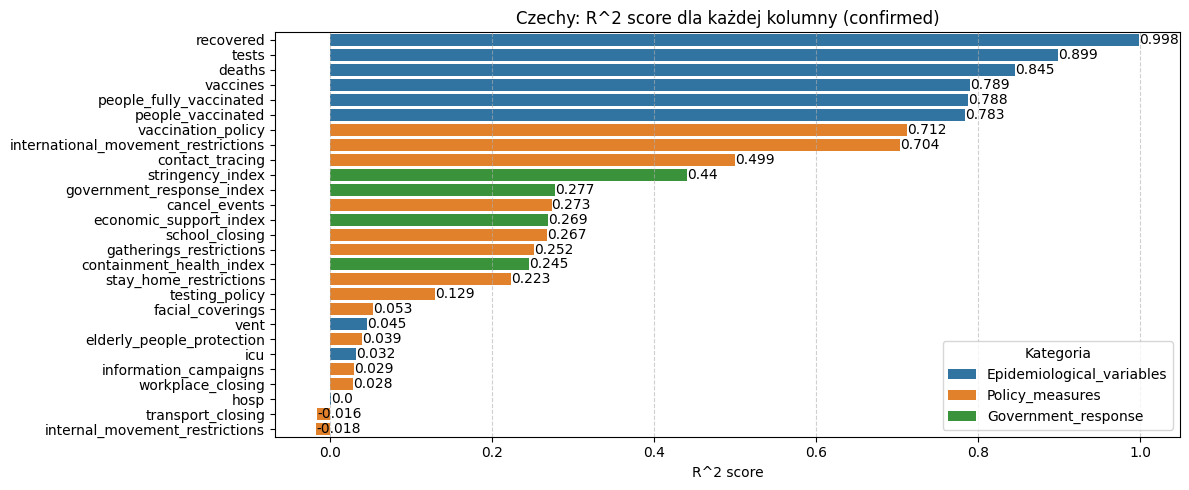

In [337]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_czechy.drop(columns='confirmed')
y = df_czechy['confirmed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = []
for column in X.columns:
    model = LinearRegression()
    model.fit(X_train[[column]], y_train)
    y_pred = model.predict(X_test[[column]])
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    models.append([column, mse, mae, r2])

df_models = pd.DataFrame(models, columns=['column', 'mse', 'mae', 'r2'])
df_models.sort_values(by='r2', ascending=False, inplace=True)
df_models.reset_index(drop=True, inplace=True)
df_models['category'] = df_models['column'].apply(lambda x: [category for category, columns in categories if x in columns][0])

plt.figure(figsize=(12, 5))
sns.barplot(data=df_models, x='r2', y='column', hue='category', dodge=False)
plt.title('Czechy: R^2 score dla każdej kolumny (confirmed)')
plt.xlabel('R^2 score')
plt.ylabel('')
plt.legend(title='Kategoria')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.6)
for i, row in df_models.iterrows():
    plt.text(row['r2'], i, round(row['r2'], 3), va='center')
plt.show()

Text(0, 0.5, 'Residuals')

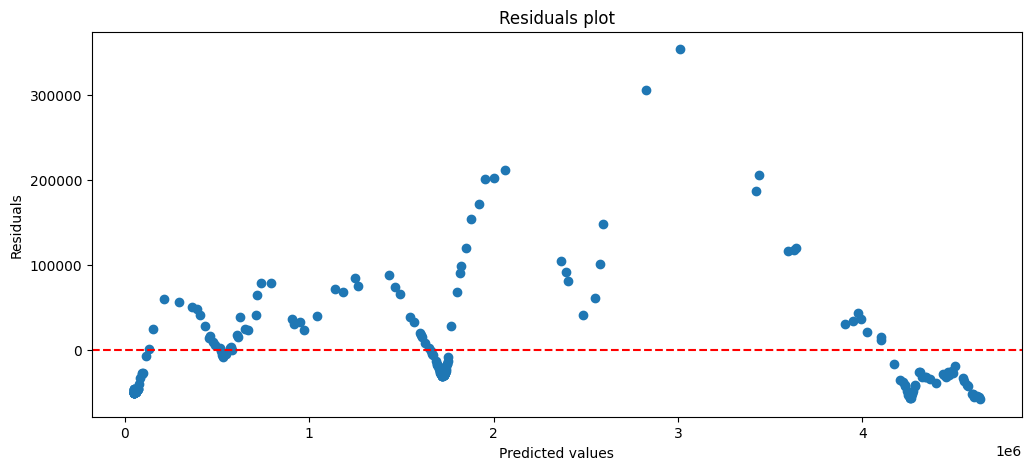

In [338]:
model = LinearRegression()
model.fit(X_train[[df_models.loc[0, 'column']]], y_train)
y_pred = model.predict(X_test[[df_models.loc[0, 'column']]])

residuals = y_test - y_pred

plt.figure(figsize=(12, 5))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

Największe R^2 osiąga zmienna "recovered" jednak przewidywanie wartości zmiennej zachorowań na podstawie wartości ozdrowień to błędne rozumowanie, gdyż liczba ozdrowień jest wynikiem przypadków choroby, która jest zależna od liczby zachorowań, a nie bezpośrednim czynnikiem wpływającym na przyszłe zachorowania. Ponadto śmiertelność w tym zbiorze wynosi tylko 1.2%, co oznacza, że liczba osób które wyzdrowiały jest bardzo zbliżona do osób, które zachorowały.

Reszty nie są rozmieszczone losowo i nie spełniają założeń homoskedastyczności.

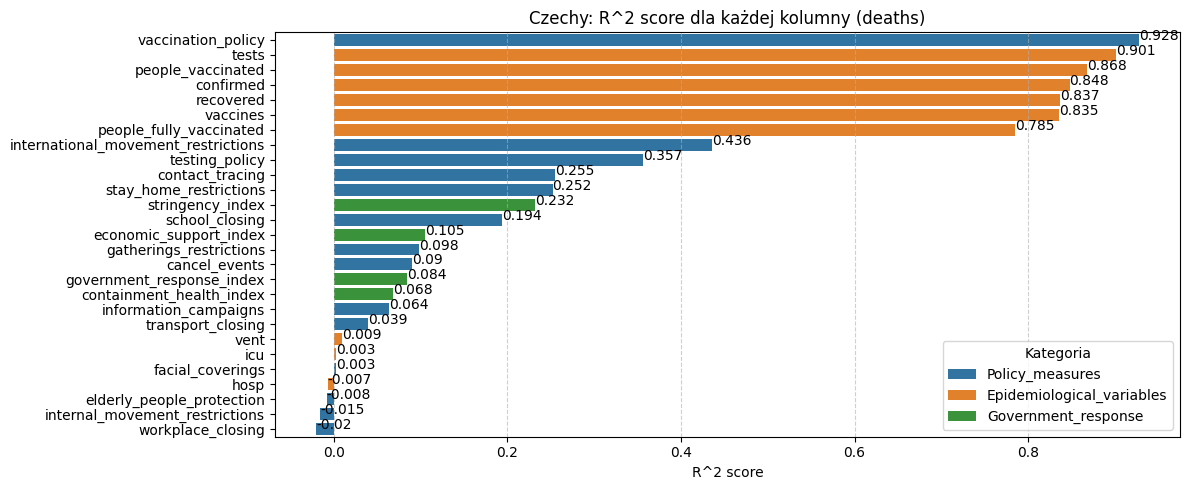

In [339]:
X = df_czechy.drop(columns='deaths')
y = df_czechy['deaths']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = []
for column in X.columns:
    model = LinearRegression()
    model.fit(X_train[[column]], y_train)
    y_pred = model.predict(X_test[[column]])
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    models.append([column, mse, mae, r2])

df_models = pd.DataFrame(models, columns=['column', 'mse', 'mae', 'r2'])
df_models.sort_values(by='r2', ascending=False, inplace=True)
df_models.reset_index(drop=True, inplace=True)
df_models

df_models['category'] = df_models['column'].apply(lambda x: [category for category, columns in categories if x in columns][0])

plt.figure(figsize=(12, 5))
sns.barplot(data=df_models, x='r2', y='column', hue='category', dodge=False)
plt.title('Czechy: R^2 score dla każdej kolumny (deaths)')
plt.xlabel('R^2 score')
plt.ylabel('')
plt.legend(title='Kategoria')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.6)
for i, row in df_models.iterrows():
    plt.text(row['r2'], i, round(row['r2'], 3))
plt.show()


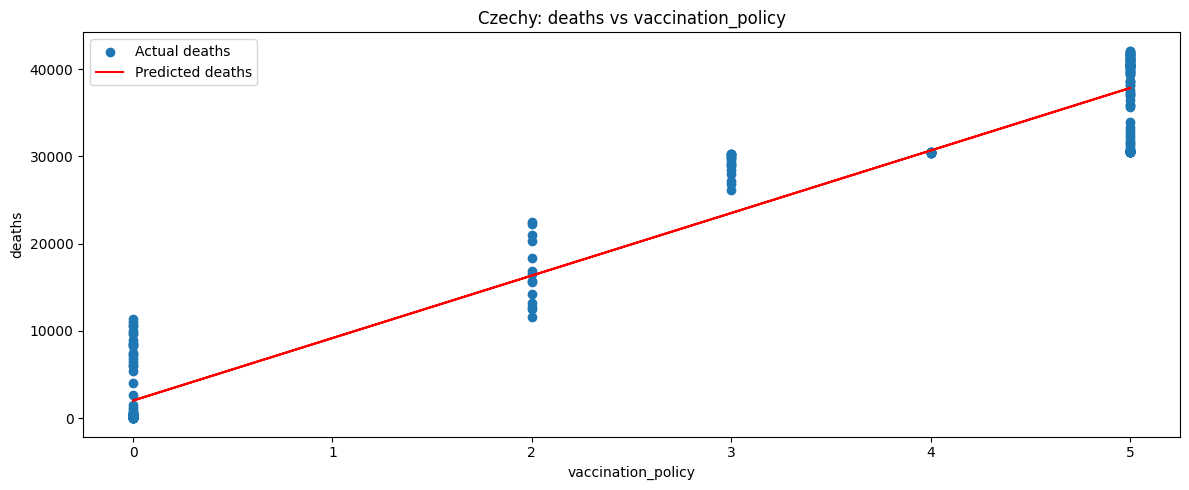

MSE: 18378381.129001196
MAE: 3554.6043829424502
R^2: 0.9275915957714821
Wzór regresji liniowej: deaths = 7163.83 * vaccination_policy + 2019.50


In [340]:
#model zmiennej 'deaths' z vaccination_policy

model = LinearRegression()
model.fit(X_train[['vaccination_policy']], y_train)
y_pred = model.predict(X_test[['vaccination_policy']])
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

plt.figure(figsize=(12, 5))
plt.scatter(X_test['vaccination_policy'], y_test, label='Actual deaths')
plt.plot(X_test['vaccination_policy'], y_pred, color='red', label='Predicted deaths')
plt.title('Czechy: deaths vs vaccination_policy')
plt.xlabel('vaccination_policy')
plt.ylabel('deaths')
plt.legend()
plt.tight_layout()
plt.show()

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')
print(f'Wzór regresji liniowej: deaths = {model.coef_[0]:.2f} * vaccination_policy + {model.intercept_:.2f}')

Model ten przedstawia niepoprawne rozumowanie, jego wyraz wolny 7163.83 to współczynnik nachylenia linii regresji, który pokazuje, jak bardzo zmieni się liczba zgonów przy jednostkowej zmianie wartości zmiennej vaccination_policy. Oznacza to, że lepszy wskaźnik vaccination_policy (szersza dostępność szczepionek) oznacza większą liczbę zgonów. Można spodziewać się, że tempo wzrostu maleje wraz z większymi wartościami vaccination_policy po tym jak ułożone są dane, jednak model regresji liniowej dla tych nie oddaje tej zależności.

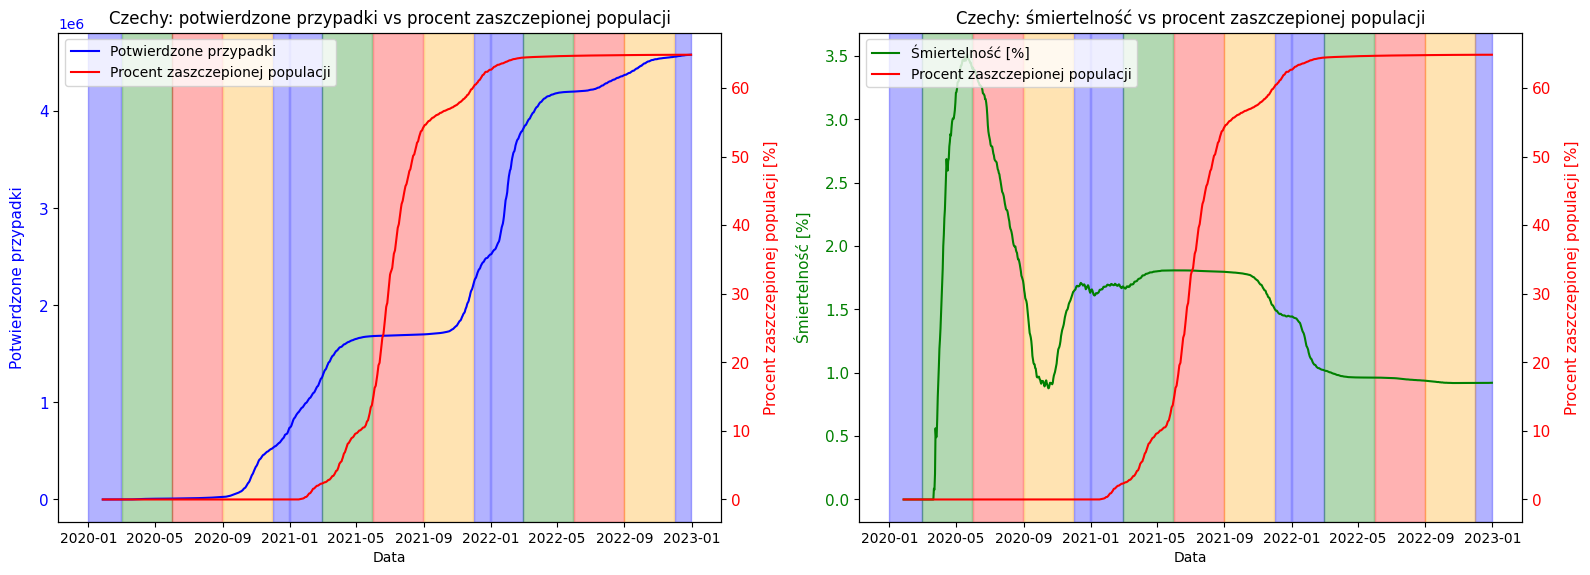

In [341]:
df_czechy['people_fully_vaccinated_percentage'] = df_czechy['people_fully_vaccinated'] / population * 100

fig, ax1 = plt.subplots(1, 2, figsize=(16, 6))
ax1[0].plot(df_czechy.index, df_czechy['confirmed'], label='Potwierdzone przypadki', color='blue')
ax1[0].set_ylabel('Potwierdzone przypadki', color='blue', fontsize=11, labelpad=10)
ax1[0].set_xlabel('Data')
ax1[0].tick_params(axis='y', labelcolor='blue', labelsize=11)


ax2 = ax1[0].twinx()
ax2.plot(df_czechy.index, df_czechy['people_fully_vaccinated_percentage'], label='Procent zaszczepionej populacji', color='red')
ax2.set_ylabel('Procent zaszczepionej populacji [%]', color='red', fontsize=11, labelpad=10)
ax2.tick_params(axis='y', labelcolor='red', labelsize=11)

#combine legends
lines, labels = ax1[0].get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

ax1[0].set_title('Czechy: potwierdzone przypadki vs procent zaszczepionej populacji')

df_czechy['mortality_rate'] = df_czechy['deaths'] / df_czechy['confirmed'] * 100
df_czechy['mortality_rate'] = df_czechy['mortality_rate'].fillna(0)

ax1[1].plot(df_czechy.index, df_czechy['mortality_rate'], label='Śmiertelność [%]', color='green')
ax1[1].set_ylabel('Śmiertelność [%]', color='green', fontsize=11, labelpad=10)
ax1[1].set_xlabel('Data')
ax1[1].tick_params(axis='y', labelcolor='green', labelsize=11)

ax3 = ax1[1].twinx()
ax3.plot(df_czechy.index, df_czechy['people_fully_vaccinated_percentage'], label='Procent zaszczepionej populacji', color='red')
ax3.set_ylabel('Procent zaszczepionej populacji [%]', color='red', fontsize=11, labelpad=10)
ax3.tick_params(axis='y', labelcolor='red', labelsize=11)

#combine legends
lines, labels = ax1[1].get_legend_handles_labels()
lines2, labels2 = ax3.get_legend_handles_labels()
ax3.legend(lines + lines2, labels + labels2, loc='upper left')

ax1[1].set_title('Czechy: śmiertelność vs procent zaszczepionej populacji')

plt.tight_layout()
#dodanie pór roku
start_year = df_czechy.index.min().year
end_year = df_czechy.index.max().year
add_season_spans(ax1[0], start_year, end_year)
add_season_spans(ax1[1], start_year, end_year)
plt.show()

Jak można zauważyć procent śmiertelności w lepszy sposób pozwala dostrzec co się działo w trakcie pandemii i jak liczba zaszczepionych osób miała na to wpływ. Widać, że w trakcie 2 fali koronawirusa śmiertelność była zdecydowanie mniejsza. Warto zwrócić też uwagę na to, że w trakcie 1 fali wirus niejako zaczynał zarażanie ludzi od zera, natomiast w 2 fali duża część osób była już wtedy chora, nosicielami itp. przez co wirus miał dużo łatwiejszy początek fali 2. Ponadto zdecydowana większość osób zaszczepiła się w lecie 2021 roku, obserwowano wtedy bardzo mało nowych zakażeń i stałą śmiertelność, najprawdopodobniej głównie wśród grup szczególnie wrażliwych na tę chorobę. Dobrym pomysłem byłoby zamodelowanie tempa rozprzestrzeniania się wirusa w 1 i 2 fali przyjmując 1 falę jako tą kiedy nie było szczepionek a 2 jako tą kiedy większość społeczeństwa była zaszczepiona, niemniej wymagałoby to dokładnych danych i informacji na temat tego jak rozprzestrzenia się wirus.

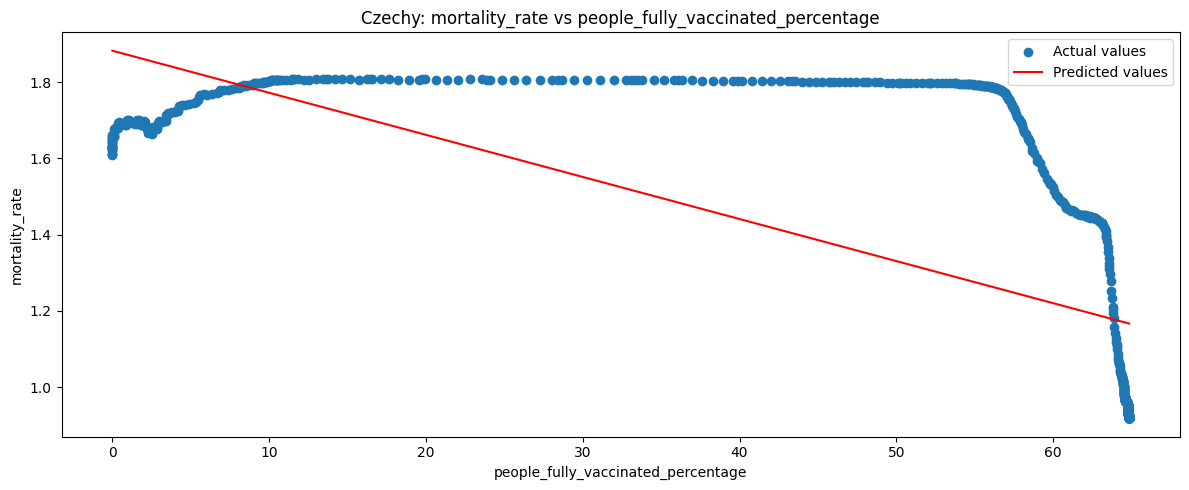

mortality_rate = 1.8825028786098126 + -0.01103596667627328 * people_fully_vaccinated_percentage
R^2: 0.4873161286349943


In [342]:
# model mortality_rate od people_fully_vaccinated_percentage, zakres danych od momentu kiedy zaszczepiono pierwszą osobę

df_szczepienia = df_czechy[df_czechy['people_fully_vaccinated'] > 0].copy()
# df_szczepienia = df_czechy.copy()

model = LinearRegression()
model.fit(df_szczepienia[['people_fully_vaccinated_percentage']], df_szczepienia['mortality_rate'])
y_pred = model.predict(df_szczepienia[['people_fully_vaccinated_percentage']])
plt.figure(figsize=(12, 5))

plt.scatter(df_szczepienia['people_fully_vaccinated_percentage'], df_szczepienia['mortality_rate'], label='Actual values')  
plt.plot(df_szczepienia['people_fully_vaccinated_percentage'], y_pred, color='red', label='Predicted values')
plt.title('Czechy: mortality_rate vs people_fully_vaccinated_percentage')
plt.xlabel('people_fully_vaccinated_percentage')
plt.ylabel('mortality_rate')

plt.legend()
plt.tight_layout()
plt.show()

print(f'mortality_rate = {model.intercept_} + {model.coef_[0]} * people_fully_vaccinated_percentage')
print(f'R^2: {r2_score(df_szczepienia["mortality_rate"], y_pred)}')

Przykładowy model śmiertelności od ilości zaszczepionych uzyskuje ujemny współczynnik przy zmiennej 'people_fully_vaccinated_percentage' co potwierdza ideę, że szczepienia zmniejszają śmiertelność populacji. Niemniej jednak ze względu na to, że zdecydowana większość osób w pełni zaszczepionych zaszczepiła się przed połową jesieni 2021, czyli przed 2 falą zachorowań na wykresie obserwujemy gwałtowny spadek i linia predykcji nie pokrywa się z faktycznymi wartościami. 

Text(0.5, 0, 'Predicted values')

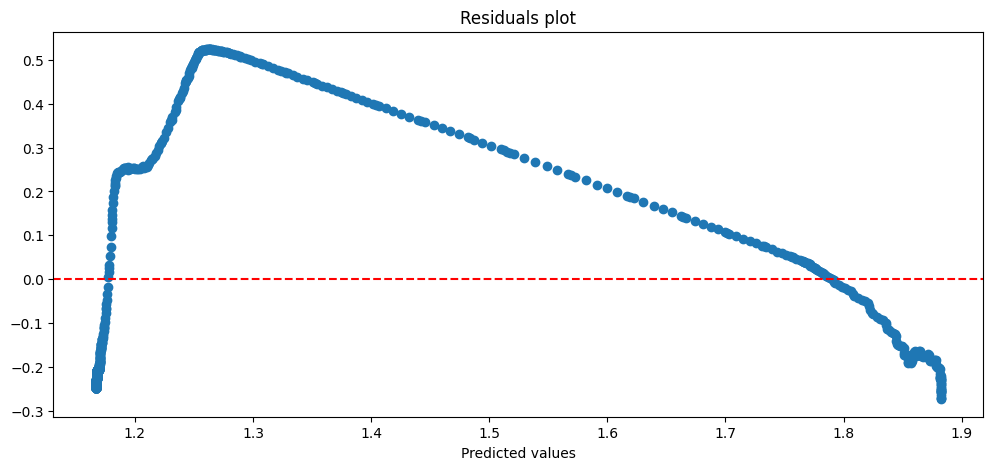

In [343]:
# reszty z modelu mortality_rate vs people_fully_vaccinated_percentage
residuals = df_szczepienia['mortality_rate'] - y_pred

plt.figure(figsize=(12, 5))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals plot')
plt.xlabel('Predicted values')

Tutaj bez zaskoczenia rezydua nie spełniają założeń regresji liniowej.

In [344]:
# odrzucenie kolumn z kategorii Policy_measures
df_czechy = df_czechy.drop(columns=Policy_measures)

Na wcześniejszych wykresach dotyczących wartości R^2 zauważono, że zmienne z kategorii Policy_measures prezentują bardzo rozbieżne wartości R^2, aby uwzględnić wszystkie działania mające na celu ograniczanie pandemii zdecydowana się do dalszych analiz wykorzystać indeksy z kategorii Government_response, które nie tylko zawierają w sobie informacje o skali lockdownu ale też o innych czynnikach takich jak np. to jak bardzo taki lockdown był respektowany przez ludzi.

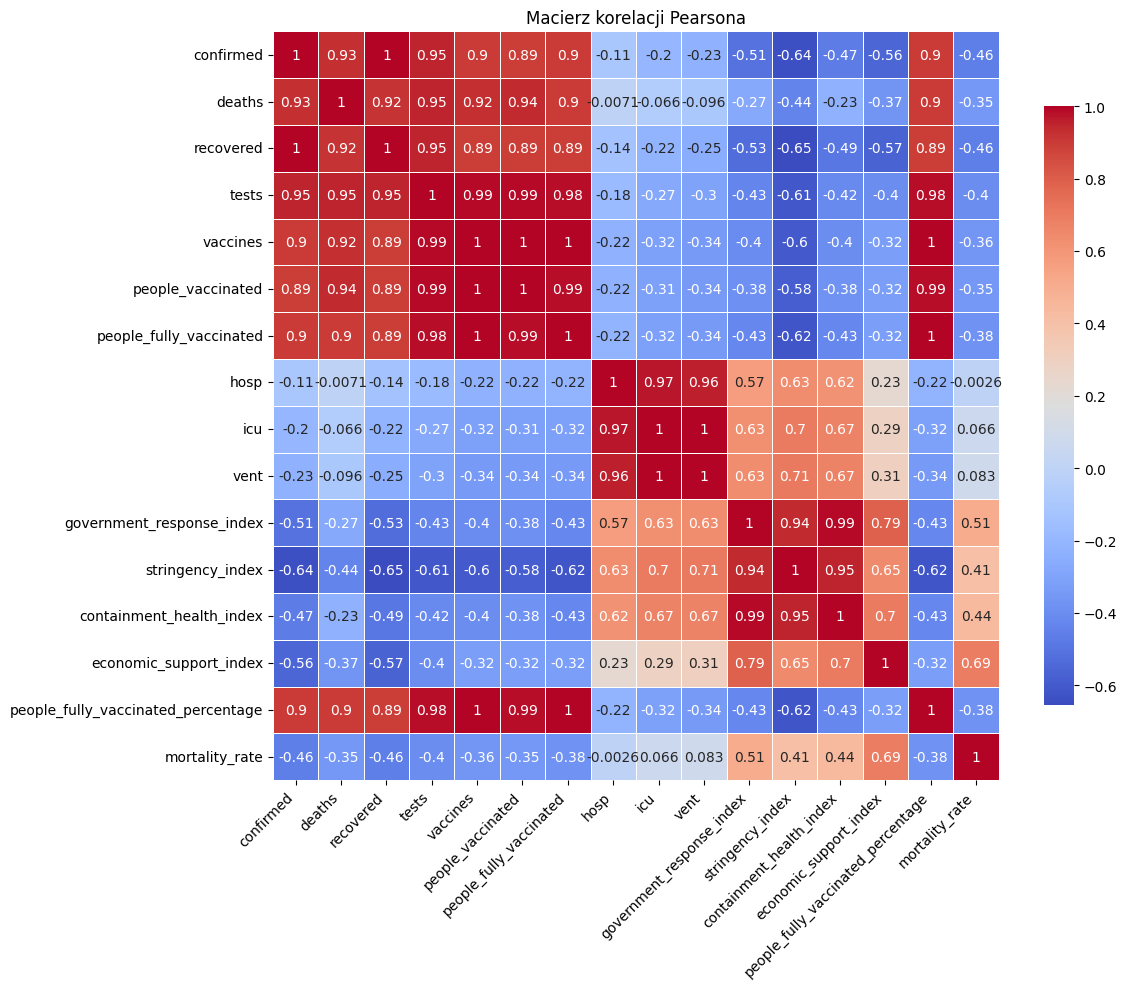

In [345]:
plt.figure(figsize=(12, 10))

sns.heatmap(df_czechy.corr(method='pearson'),
            annot=True, 
            cmap='coolwarm', 
            linewidths=0.5, 
            cbar_kws={"shrink": .8},
            annot_kws={"size": 10})

plt.title('Macierz korelacji Pearsona')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

# REGRESJA WIELORAKA 

Zmienna 'economic_support_index' tylko nieznacznie podnosi jakość modelu i dalszą część modelowania można by przeprowadzić bez jej uwzględniania i osiągnąć bardzo zbliżone wyniki, jednak ze względu na spójność zdecydowano się ją zostawić w dalszych analizach aby zastosować wszystkie indeksy dostępne w zbiorze danych.

MSE: 618630690218.614
MAE: 620498.6145222842
R^2: 0.7599394720062244


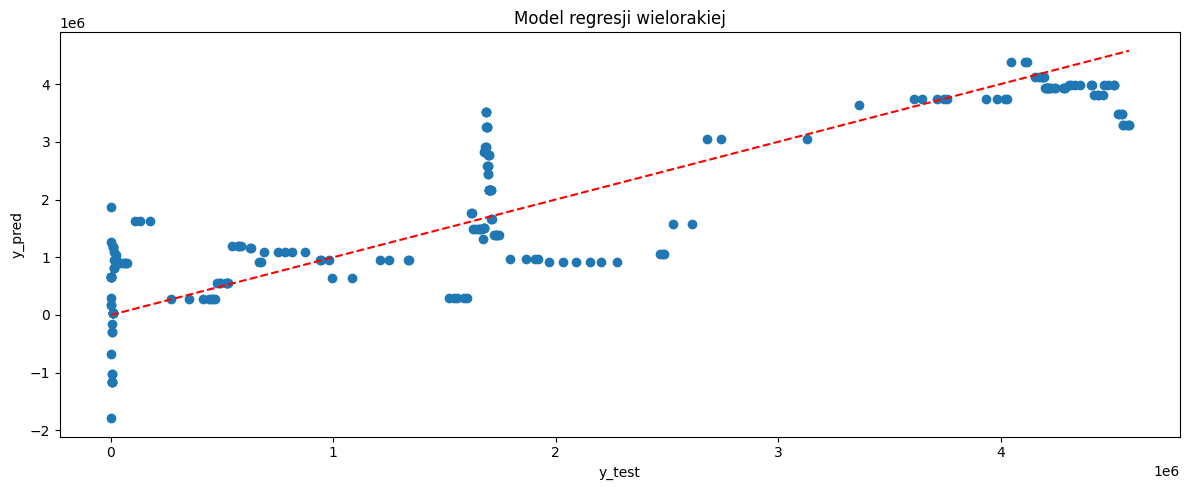

In [346]:
# model regresji wielorakiej dla zmiennej 'confirmed' i zmiennych wyjaśniających z kategorii 'Government_response'
X = df_czechy[['government_response_index', 'stringency_index', 'containment_health_index', 'economic_support_index']]
y = df_czechy['confirmed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')

plt.figure(figsize=(12, 5))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Model regresji wielorakiej')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.tight_layout()
plt.show()

Udało się osiągnąć dość dobry model dla regresji liniowej o wartości R^2 0.76, świadczy to o tym, że na podstawie zmiennych z kategorii 'Government_response' można całkiem dobrze przewidywać ilość nowych zachorowań. Wartość R^2 nie jest na tyle wysoka aby świadczyć o przeuczeniu się modelu. Linia predykcji dość dobrze pokrywa się z punktami na wykresie.

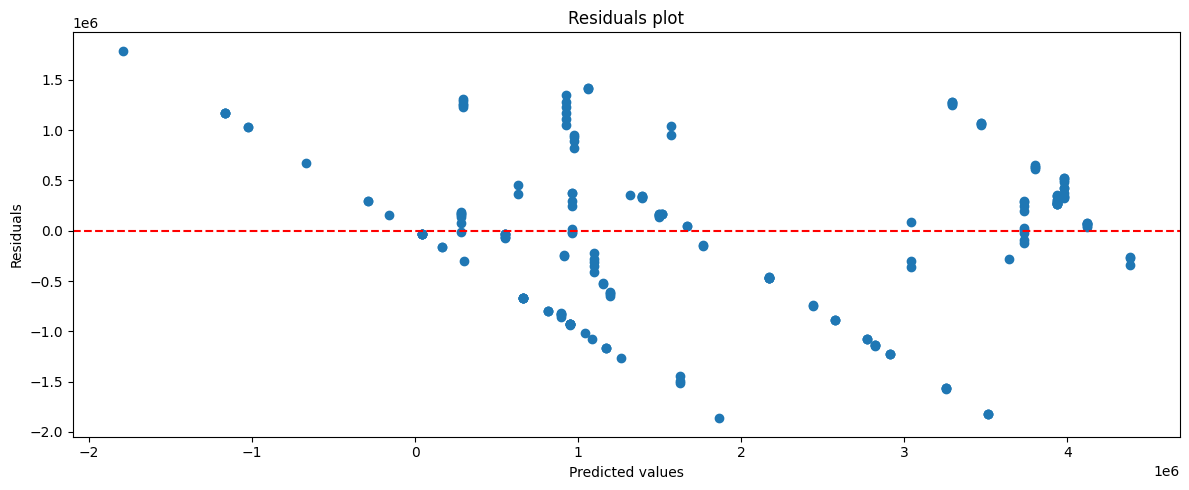

In [347]:
# reszty modelu
residuals = y_test - y_pred

plt.figure(figsize=(12, 5))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.tight_layout()

Rezydua tutaj nie są idealnie rozproszone wokół wartości 0 i daje się dostrzec w nich pewien wzór, jednak są one jednymi z najlepszych jakie udało się osiągnąć wśród wszystkich modeli w trakcie tej analizy.

SVR:
MSE: 2598370840392.6885
MAE: 1288846.705139144
R^2: -0.00830153713820847

DecisionTreeRegressor:
MSE: 3881587429.217335
MAE: 32494.73566147371
R^2: 0.9984937444222455

RandomForestRegressor:
MSE: 10543989793.30285
MAE: 39589.31300832309
R^2: 0.9959083896144131



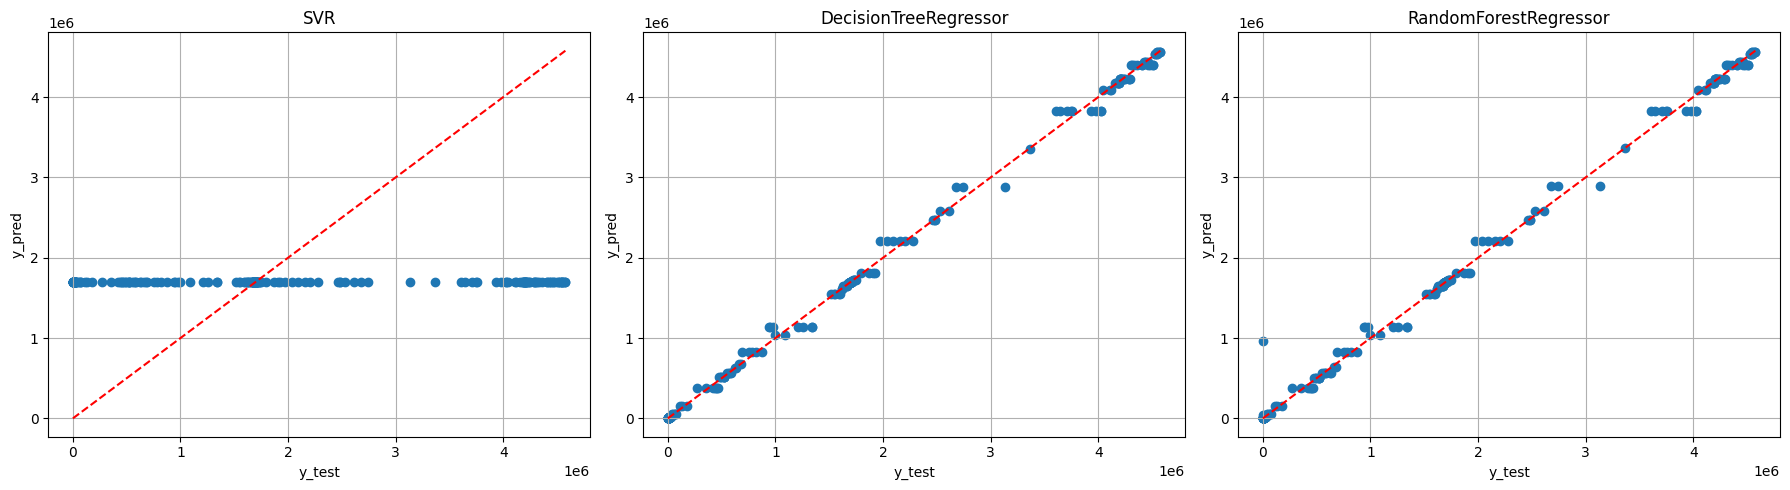

In [348]:
# Predykcja SVR, Drzewa Regresyjne i Losowy Las Regresyjny dla zmiennej 'confirmed' i zmiennych wyjaśniających z kategorii 'Government_response'

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

X = df_czechy[['government_response_index', 'stringency_index', 'containment_health_index', 'economic_support_index']]
y = df_czechy['confirmed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = [
    ('SVR', SVR()),
    ('DecisionTreeRegressor', DecisionTreeRegressor()),
    ('RandomForestRegressor', RandomForestRegressor())
]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}:')
    print(f'MSE: {mse}')
    print(f'MAE: {mae}')
    print(f'R^2: {r2}')
    print()

#wykresy modeli regresji
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

for i, (name, model) in enumerate(models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    ax[i].scatter(y_test, y_pred)
    ax[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    ax[i].set_title(name)
    ax[i].set_xlabel('y_test')
    ax[i].set_ylabel('y_pred')
    ax[i].grid()

plt.tight_layout()
plt.show()


Modele Drzewa Regresyjne i Losowy Las Regresyjny osiągają bardzo dobre i zbliżone do siebie wyniki dla tych danych, oba modele mają R^2 większe niż 0.99, model SVR kompletnie nie radzi sobie z tymi danymi i osiąga ujemne R^2.


MSE: 70023593.55139884
MAE: 6860.183448815961
R^2: 0.7241162520347253


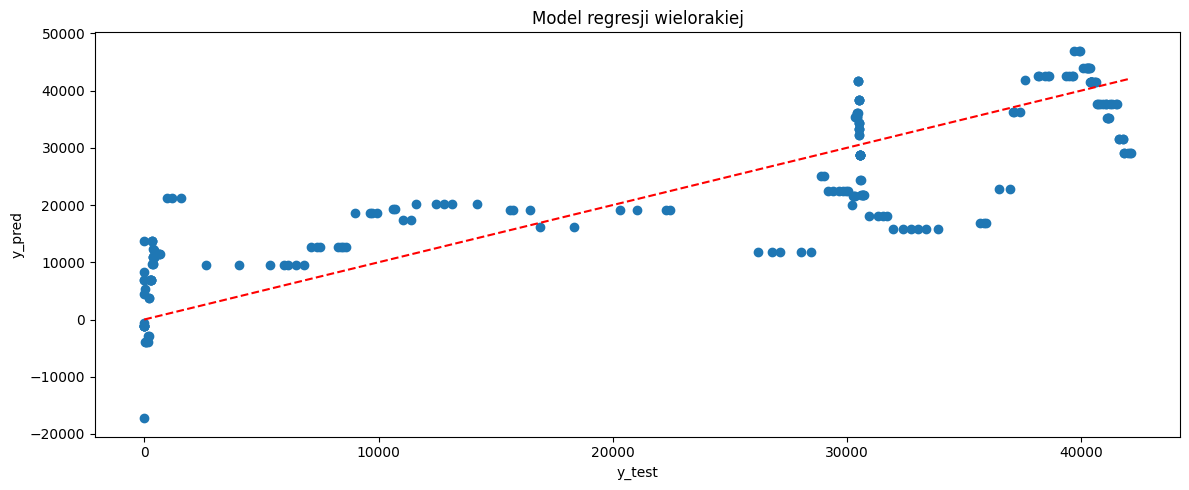

In [349]:
# zmienna 'deaths' i zmiennych wyjaśniających z kategorii 'Government_response'

X = df_czechy[['government_response_index', 'stringency_index', 'containment_health_index', 'economic_support_index']]
y = df_czechy['deaths']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')

plt.figure(figsize=(12, 5))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Model regresji wielorakiej')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.tight_layout()
plt.show()

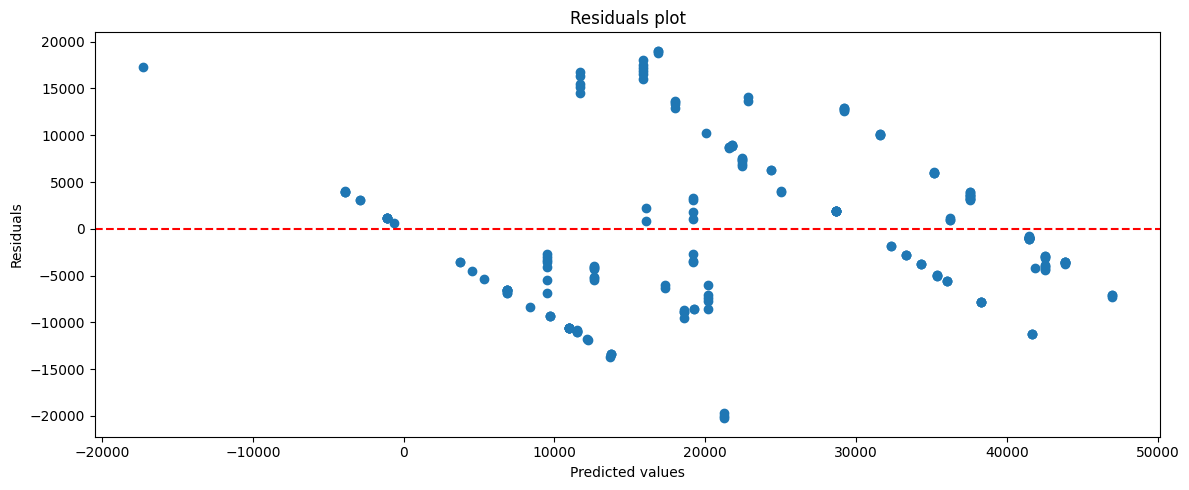

In [350]:
# reszty modelu
residuals = y_test - y_pred

plt.figure(figsize=(12, 5))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.tight_layout()

SVR:
MSE: 310907996.42693466
MAE: 13414.064017641549
R^2: -0.22493661031087542

DecisionTreeRegressor:
MSE: 456880.20389918383
MAE: 308.2692774483774
R^2: 0.9981999520928567

RandomForestRegressor:
MSE: 993523.5834132052
MAE: 399.0656977205432
R^2: 0.9960856477655244



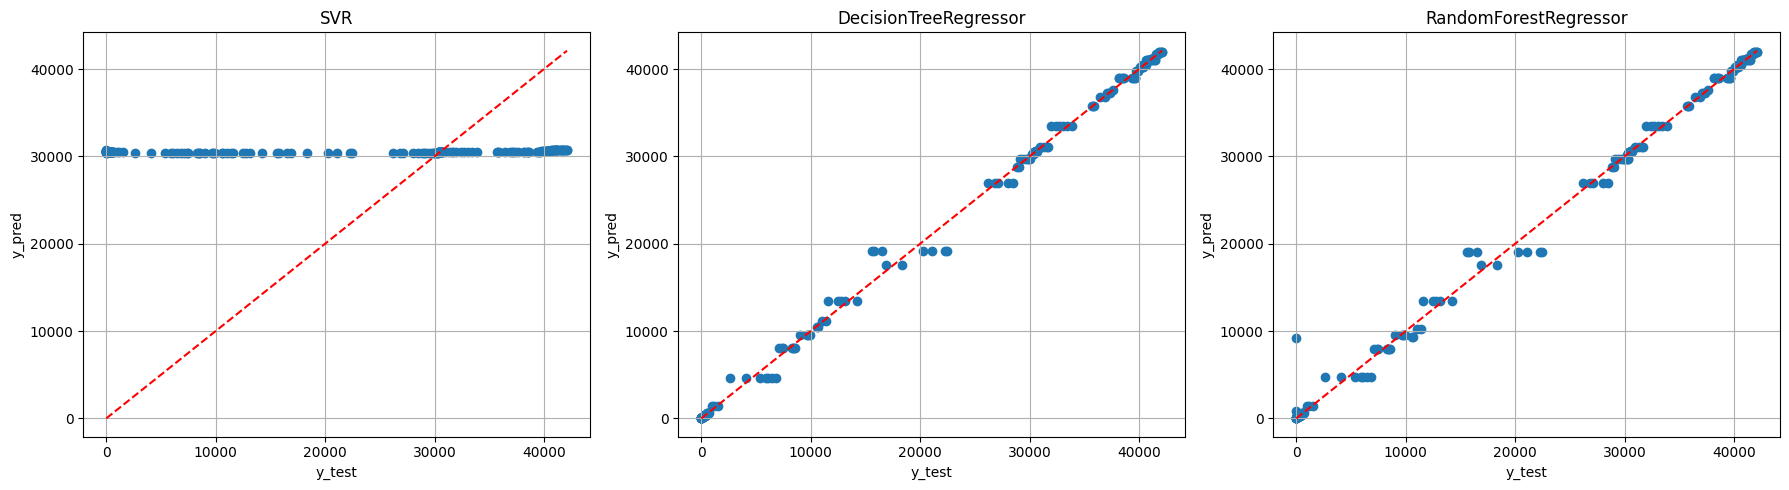

In [351]:
# Predykcja SVR, Drzewa Regresyjne i Losowy Las Regresyjny dla zmiennej 'deaths' i zmiennych wyjaśniających z kategorii 'Government_response'

X = df_czechy[['government_response_index', 'stringency_index', 'containment_health_index', 'economic_support_index']]
y = df_czechy['deaths']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = [
    ('SVR', SVR()),
    ('DecisionTreeRegressor', DecisionTreeRegressor()),
    ('RandomForestRegressor', RandomForestRegressor())
]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}:')
    print(f'MSE: {mse}')
    print(f'MAE: {mae}')
    print(f'R^2: {r2}')
    print()

#wykresy modeli regresji

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

for i, (name, model) in enumerate(models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    ax[i].scatter(y_test, y_pred)
    ax[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    ax[i].set_title(name)
    ax[i].set_xlabel('y_test')
    ax[i].set_ylabel('y_pred')
    ax[i].grid()

plt.tight_layout()
plt.show()